# Two Sigma Demo

March 22, 2017

Demonstrating the features of [`cartoframes`](https://github.com/cartodb/cartoframes/).

In [1]:
import pandas as pd
import cartoframes
import json

# load my CARTO credentials
USERNAME = json.loads(open('../credentials.json').read())['username']
APIKEY = json.loads(open('../credentials.json').read())['api_key']

In [2]:
# read from a CSV
df = pd.read_csv('../ts_demo/starbucks_manhattan.csv')
df.head()

,brand,city,country,countrysubdivision,fid,field_11,latitude,longitude,name,ownership_type,phone_number,postal_code,store_id,streetcombined
0,Starbucks,New York,US,NY,1.0,NaN,40.789288,-73.975327,88th & Broadway,CO,212-595-3404,100241703,6590.0,2394 Broadway
1,Starbucks,New York,US,NY,2.0,NaN,40.756863,-73.972633,50th & Lex,CO,212-751-2937,100226828,9231.0,560 Lexington Avenue
2,Starbucks,New York,US,NY,3.0,NaN,40.743679,-73.976868,32nd & 2nd,CO,212-684-1299,100164803,15875.0,585 2nd Avenue
3,Starbucks,New York,US,NY,4.0,NaN,40.756962,-73.975899,49th & Madison,CO,212/644/9462,100171110,17016.0,425 Madison Avenue
4,Starbucks,New York,US,NY,5.0,NaN,40.748234,-73.985626,33rd btwn 5th & 6th,CO,2125649141,10001,1012266.0,"350 Fifth Avenue, 130"


In [3]:
# link dataframe with CARTO
df.sync_carto(requested_tablename='manhattan_starbucks_demo',
              lnglat_cols=('longitude', 'latitude'),
              username=USERNAME,
              api_key=APIKEY)
df.head()

New cartoframe created. Table on CARTO is called `manhattan_starbucks_demo`


,brand,city,country,countrysubdivision,fid,field_11,latitude,longitude,name,ownership_type,phone_number,postal_code,store_id,streetcombined,the_geom
cartodb_id,,,,,,,,,,,,,,,
1,Starbucks,New York,US,NY,1.0,NaN,40.789288,-73.975327,88th & Broadway,CO,212-595-3404,100241703,6590.0,2394 Broadway,0101000020E6100000B60CFE9F3F7E52C09F2EFFDFE060...
2,Starbucks,New York,US,NY,2.0,NaN,40.756863,-73.972633,50th & Lex,CO,212-751-2937,100226828,9231.0,560 Lexington Avenue,0101000020E6100000A4870400857E52C0343C07E0305F...
3,Starbucks,New York,US,NY,3.0,NaN,40.743679,-73.976868,32nd & 2nd,CO,212-684-1299,100164803,15875.0,585 2nd Avenue,0101000020E61000007D20FD1F757E52C03E9CFA1FE460...
4,Starbucks,New York,US,NY,4.0,NaN,40.756962,-73.975899,49th & Madison,CO,212/644/9462,100171110,17016.0,425 Madison Avenue,0101000020E6100000BA3EFF7F147F52C083610A20C65F...
5,Starbucks,New York,US,NY,5.0,NaN,40.748234,-73.985626,33rd btwn 5th & 6th,CO,2125649141,10001,1012266.0,"350 Fifth Avenue, 130",0101000020E61000001AE9FB5F247D52C01F5AF99FDB63...


In [6]:
# style map by ownership_type column (will work soon with private data)
df.carto_map(color='ownership_type', interactive=False)

In [8]:
# get population, other measures within 5 minute walk time
df_buffer = pd.read_carto(username=USERNAME,
                          api_key=APIKEY,
                          query=('''
                              SELECT 
                                ST_Buffer(the_geom::geography, 400)::geometry as the_geom,
                                brand, name, ownership_type, store_id
                              FROM manhattan_starbucks_demo
                          '''),
                          tablename='manhattan_starbucks_walkability')

# Data Observatory measures: population, 
#                            normalized completed high school, 
#                            median income, 
#                            normalized poverty)

data_obs_measures = [{'numer_id': 'us.census.acs.B01003001'},
                     {'numer_id': 'us.census.acs.B15003017', 'denominator': 'predenominated'},
                     {'numer_id': 'us.census.acs.B19013001'},
                     {'numer_id': 'us.census.acs.B17001002', 'denominator': 'predenominated'}]
df_buffer.carto_do_augment(data_obs_measures)
df_buffer.head(10)

Named map name: manhattan_starbucks_walkability_1490195613_60156


,brand,name,ownership_type,store_id,the_geom,the_geom_webmercator,high_school_diploma_2011_2015,median_income_2011_2015,poverty_2011_2015,total_pop_2011_2015
cartodb_id,,,,,,,,,,
1,Starbucks,88th & Broadway,CO,6590.0,0103000020E610000001000000210000004764A5151E7E...,0103000020110F00000100000021000000A9AA6FFF5F69...,0.064742,110569.725214,0.070784,32038.943451
2,Starbucks,50th & Lex,CO,9231.0,0103000020E6100000010000002100000088864FFFF17D...,0103000020110F000001000000210000005CB3751C1569...,0.065435,116835.862188,0.061972,13578.618309
3,Starbucks,32nd & 2nd,CO,15875.0,0103000020E6100000010000002100000094EA3B63377E...,0103000020110F00000100000021000000EB6E45FA8A69...,0.065161,100303.862111,0.103125,41360.639422
4,Starbucks,49th & Madison,CO,17016.0,0103000020E610000001000000210000007FD2417F277E...,0103000020110F00000100000021000000842E67FC6F69...,0.078135,109206.338546,0.070963,3968.703582
5,Starbucks,33rd btwn 5th & 6th,CO,1012266.0,0103000020E6100000010000002100000076B3CDE1C67E...,0103000020110F00000100000021000000FE4EA2B77E6A...,0.040500,119868.460396,0.135634,14263.564927
6,Starbucks,87th & Lexington,CO,12096.0,0103000020E6100000010000002100000050CC79B8D67C...,0103000020110F0000010000002100000069D8EBEF3367...,0.039830,125541.211822,0.054719,52625.039046
7,Starbucks,23rd btwn 5th & 6th,CO,6756.0,0103000020E610000001000000210000002AF4BCA3137F...,0103000020110F00000100000021000000AE760619016B...,0.030932,134578.893872,0.099419,22538.303569
8,Starbucks,42nd & 2nd,CO,6869.0,0103000020E61000000100000021000000EC736EC1F47D...,0103000020110F000001000000210000005884E0CB1969...,0.037996,109825.129949,0.081372,31677.006264
9,Starbucks,103rd & Broadway,CO,7458.0,0103000020E61000000100000021000000C675D112AC7D...,0103000020110F00000100000021000000A30BAC569E68...,0.088600,69375.236764,0.216537,30289.709994


Populating the interactive namespace from numpy and matplotlib


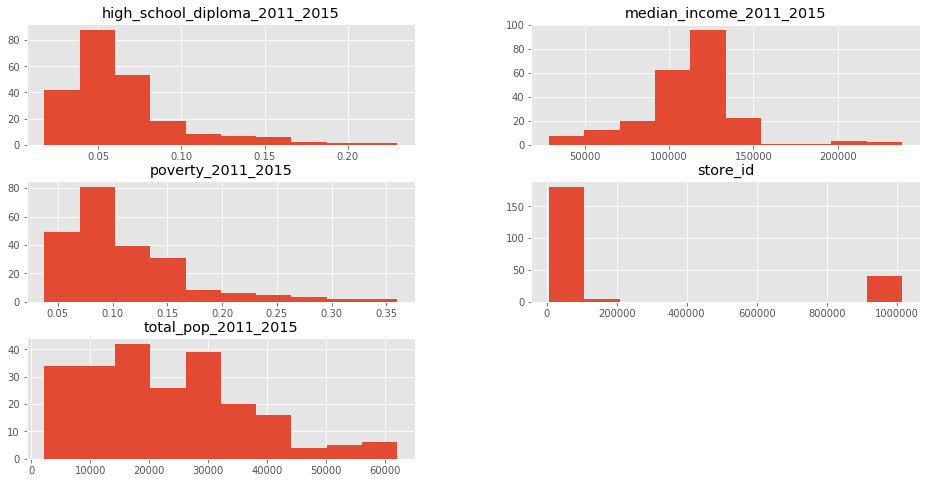

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# plt.figure(figsize=(20,10));
# df_buffer.plot(x='total_pop_2011_2015', y='median_income_2011_2015', kind='scatter')
df_buffer.hist(figsize=(16, 8));

In [7]:
df_buffer.carto_map(stylecol='total_pop_2011_2015')